# 第４章 制限三体問題

- 純粋な三体問題を解くのは難しい
- 太陽、地球、月のような
- 天体に関して、ある制限下で簡単なケースが再現できる
  - 制約
    - ２つのプライマリー天体が両者の共通重心の周りに円軌道を描く
    - 無限の小さい質量を持つ第３の天体がそれら二体の描く軌道面内で、両者の重力場の影響を受けながら運動する。
    - 第３天体自体はその質量が実質上ゼロとなるため、プライマリーの起動は重量苦的影響をなんら受けない。
- ラグランジュ点ができる。

## 数式

![note4_1](./pic/note_4_1.jpg)
![note4_2](./pic/note_4_2.jpg)

In [19]:
import numpy as np
from dataclasses import dataclass
import pandas as pd
# print("Astrophysics with a PC: Restricted Threebody problem")
# print("Input of initial conditions and parameters : ")
# print("Mass Paraneter mu:")
# mu = float(input())
# print("Initial conditions: ")
# print("x(0) = ")
# x = float(input())
# print("y(0) = ")
# y = float(input())
# print("u(0) = ")
# u = float(input())
# print("v(0) = ")
# v = float(input())
# print("Time step: ")
# dt = float(input())
mu = 0.0000525
x = -0.6073955952
y = -0.7774968265
u = 0.1083342234
v = -0.084639971594
dt = 0.05

t = 0
n = 20

def r1(x: float, y: float, mu: float) -> float:
    r1 = np.sqrt((x - mu)**2 + y**2)
    return max(r1, 1e-10)

def r2(x: float, y: float, mu: float) -> float:
    r2 = np.sqrt((x + 1 - mu)**2 + y**2)
    return max(r2, 1e-10)

def fu(x: float, y: float, u: float, v: float, mu: float) -> float:
    r1_val = r1(x, y, mu)
    r2_val = r2(x, y, mu)
    fu = -(1 - mu)*(x - mu) / r1_val**3 - mu*(x + 1 - mu) / r2_val**3 + x + 2*v
    return max(fu, 1e-10)

def fv(x: float, y: float, u: float, v: float, mu: float) -> float:
    r1_val = r1(x, y, mu)
    r2_val = r2(x, y, mu)
    fv = -(1 - mu)*y / r1_val**3 - mu*y / r2_val**3 + y - 2*u
    return max(fv, 1e-10)
ni = 0

data = []
@dataclass
class Data:
    ni: int
    t: float
    x: float
    y: float
    u: float
    v: float

iteration_max = 200

while True:
    for i in range(20):
        x1 = x + 0.5 * dt * u
        y1 = y + 0.5 * dt * v
        u1 = u + 0.5 * dt * fu(x, y, u, v, mu)
        v1 = v + 0.5 * dt * fv(x, y, u, v, mu)

        x = x + dt*u1
        y = y + dt*v1
        u = u + dt*fu(x1, y1, u1, v1, mu)

        print(f"{ni}\t{t}\t{x}\t{y}\t{u}\t{v}")
        t += dt
        ni += 1
        data.append(Data(ni, t, x, y, u, v))

    # print("Continue (y/n)?")
    # cont = input()
    # if cont == "n":
    #     break
    if ni > iteration_max:
        break

df = pd.DataFrame([d.__dict__ for d in data])
print(df)
df.to_csv("output/three_body.csv", index=False)

0	0	-0.601978884029875	-0.781728825079575	0.108334223405	-0.084639971594
1	0.05	-0.5965621728595	-0.78596082365915	0.10833422341	-0.084639971594
2	0.1	-0.5911454616888749	-0.790192822238725	0.108334223415	-0.084639971594
3	0.15000000000000002	-0.5857287505179999	-0.7944248208183	0.10833422342	-0.084639971594
4	0.2	-0.5803120393468749	-0.798656819397875	0.108334223425	-0.084639971594
5	0.25	-0.5748953281754999	-0.80288881797745	0.10833422343	-0.084639971594
6	0.3	-0.5694786170038749	-0.8071208165570251	0.108334223435	-0.084639971594
7	0.35	-0.5640619058319999	-0.8113528151366001	0.10833422344	-0.084639971594
8	0.39999999999999997	-0.5586451946598748	-0.8155848137161751	0.108334223445	-0.084639971594
9	0.44999999999999996	-0.5532284834874999	-0.8198168122957501	0.10833422345	-0.084639971594
10	0.49999999999999994	-0.5478117723148749	-0.8240488108753251	0.108334223455	-0.084639971594
11	0.5499999999999999	-0.5423950611419999	-0.8282808094549001	0.10833422346	-0.084639971594
12	0.6	-0.5369

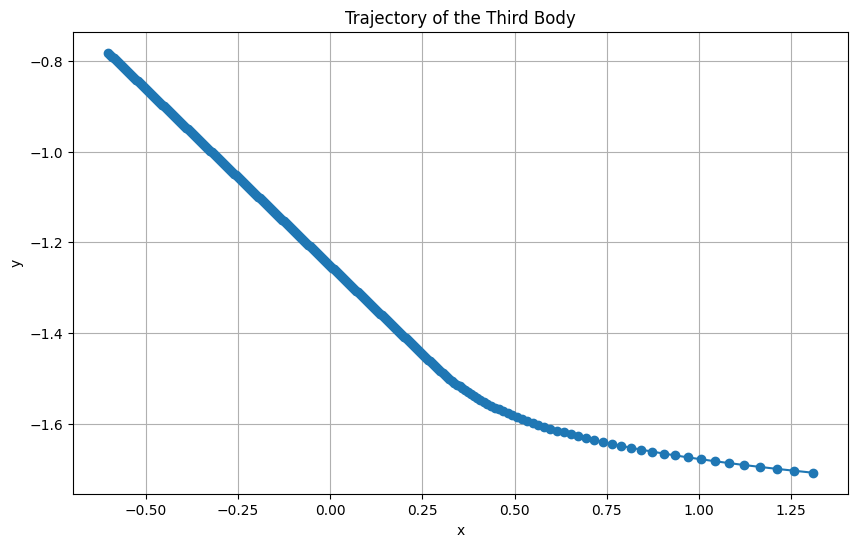

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], marker='o')
plt.title('Trajectory of the Third Body')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## トロヤ郡小惑星

- 木星と太陽のラグランジュ点$L_4$, $L_5$に存在する小惑星帯.
- ラグランジュ点とは
  - 二体問題の等ポテンシャル面のこと. 
  - $L_1$: X軸上、両プライマリーの間, 第２プライマリーに近い, 近接連星の進化に重要
  - $L_2$, $L_3$: X軸上, 両プライマリの外側
  - $L, 4, L_5$: ２つのプライマリと正三角形をなす位置関係。正三角形点とも呼ぶ
    - $L_4: (\mu - 0.5, 0.8660254)$
    - $L_5: (\mu - 0.5, -0.8660254)$
- トロヤ群小惑星帯は木製軌道上で、木製より60度遅れた場所に位置
- 太陽木星系
  - 質量パラメータ$\mu = 0.000953875$
  - 平均角速度は$\omega  = 1.6788\times 10^{-8} {\rm rad / sec}$
  - 換算時間$dt = 1$の実時間は$\frac{1}{\omega} = 5.9567\times 10^7 {\rm sec} = 1.8876{\rm year}$
  - 太陽木星間の平均距離$5.203A.U. = 780\times 10^6 {\rm m}$
  - 太陽木星系の質量$\sim$太陽の質量$= 2\times 10^{33}{\rm g}$
- ラーべの初期条件を使えば精度良く再現できる。

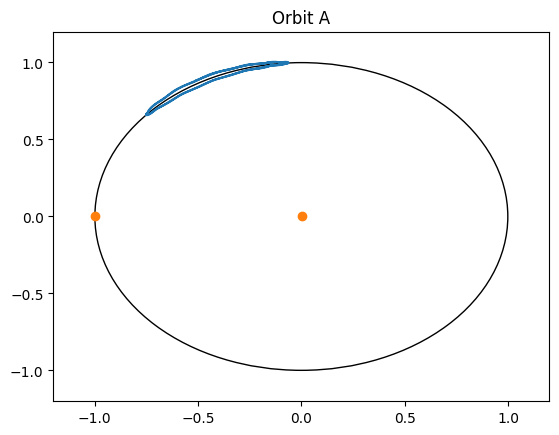

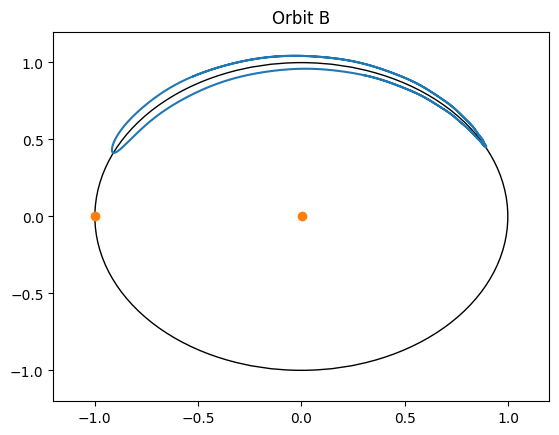

In [1]:
from astrophysics.calculation.orbit.restricted_three_body_problem import RestrictedThreeBodyProblem

mu = 0.000953875
# ラーべの初期条件　軌道A
x0 = -0.509046125
y0 = 0.883345912
u0 = 0.0258975212
v0 = 0.014272418
dt = 0.4

problem1 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=500)
problem1.calc()
problem1.plot("Orbit A")

# ラーべの初期条件　軌道B
x0 = -0.524046125
y0 = 0.909326674
u0 = 0.0646761399
v0 = 0.0367068277
dt = 0.2 # or 0.3
problem1 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=1000)
problem1.calc()
problem1.plot("Orbit B")

## 地球、月系

- 質量パラメータ$\mu = 0.0121409319$
- 理論上は$L_4, L_5$周りの周期軌道は存在するが、太陽などの摂動が大きすぎて、軌道は安定しない。

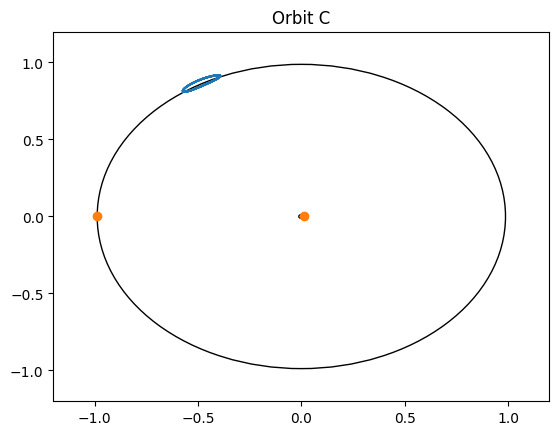

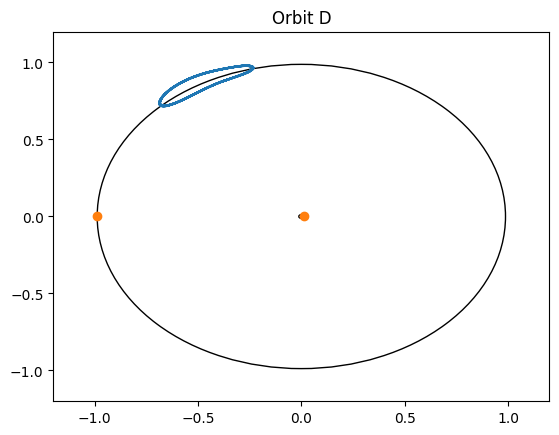

In [3]:
from astrophysics.calculation.orbit.restricted_three_body_problem import RestrictedThreeBodyProblem
mu = 0.0121409319
mu = 0.0121396054
# ラーベの初期条件　軌道C
x0 = -0.4978603946
y0 = 0.8833459119
u0 = 0.0265752203
v0 = 0.0146709149
problem3 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=500)
problem3.calc()
problem3.plot("Orbit C")

# ラーべの初期条件　軌道D
x0 = -0.5128603946
y0 = 0.9093266740
u0 = 0.0682722747
v0 = 0.0334034039
problem4 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=1000)
problem4.calc()
problem4.plot("Orbit D")

## 軌道間共鳴

![153Hilda](./pic/153Hilda.png)
![Hilda_asteroids](./pic/Hilda_asteroids.png)
![Thule_orbit](./pic/Thule_orbit.png)

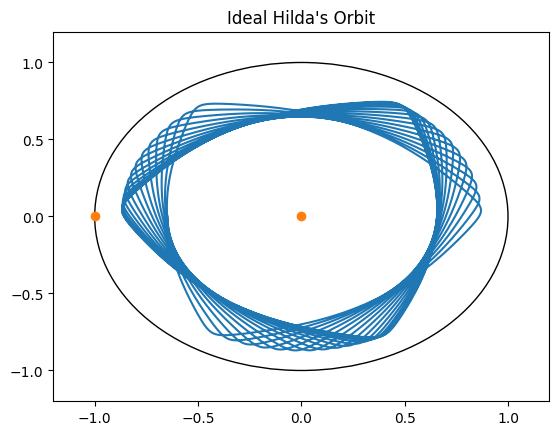

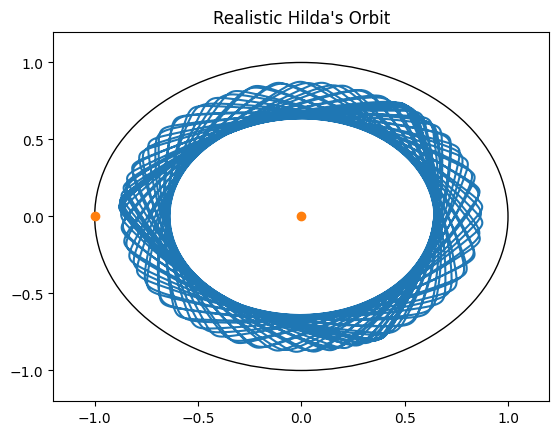

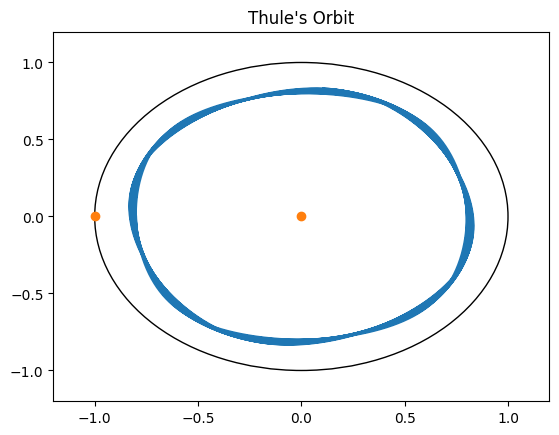

In [11]:
from astrophysics.calculation.orbit.restricted_three_body_problem import RestrictedThreeBodyProblem
mu = 0.00002
# ヒルダの理想軌道
x0 = -0.647717531
y0 = 0.0
u0 = 0.0
v0 = -0.6828143998
dt = 0.02
problem5 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=10000)
problem5.calc()
problem5.plot("Ideal Hilda's Orbit")

# ヒルダの現実的な軌道
x0 = -0.4952265404
y0 = -0.4163448036
u0 = 0.4389046359
v0 = -0.5230661767
dt = 0.05
problem6 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=10000)
problem6.calc()
problem6.plot("Realistic Hilda's Orbit")

# チューレの軌道
x0 = -0.7997632829
y0 = -0.0
u0 = 0.0
v0 = -0.334548184
dt = 0.02
problem7 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max=10000)
problem7.calc()
problem7.plot("Thule's Orbit")




### 冥王星・海王星

- 海王星軌道
  - $e = 0$
  - $P = 165.62$
  - $a = 30.1584$
- 冥王星軌道
  - $e = 0.247$
  - $P = 248.43$
  - $a = 39.5182$
- $mu = 0.0000525$

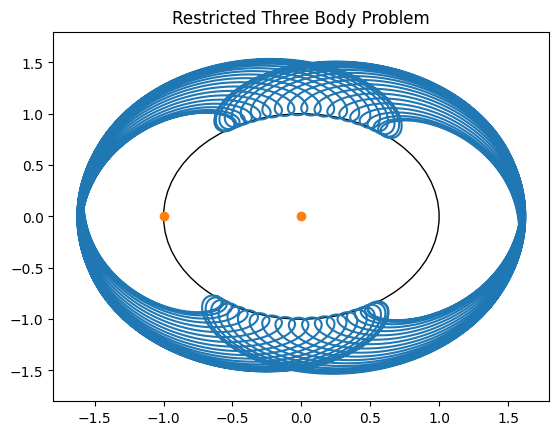

In [2]:
from astrophysics.calculation.orbit.restricted_three_body_problem import RestrictedThreeBodyProblem
mu = 0.0000525
# 初期条件
x0 = -0.6073955952
y0 = -0.7774968265
u0 = 0.1083342234
v0 = -0.084639971594
dt = 0.05
iter_max = 7700

problem8 = RestrictedThreeBodyProblem(mu, x0, y0, u0, v0, dt, iter_max)
problem8.calc()
problem8.plot("Restricted Three Body Problem")